In [ ]:
import numpy as np    # numerical computations
import pandas as pd   # data manipulation
import matplotlib.pyplot as plt   # plotting
from sklearn.preprocessing import StandardScaler  # scikit-learn (machine learning) and StandardScaler is a popular preprocessing technique used in machine learning to normalize numerical input data before feeding it into a model. it has fit, transform, and fit_transform methods, allowing it to learn and apply the transformation to the data.
from imblearn.over_sampling import RandomOverSampler # Imbalanced-learn (imblearn) and Random over-sampling aims to address the class imbalance by randomly duplicating examples from the minority class until both classes have an equal number of samples.




### Dataset:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
# df["class"].unique()  # g, h stands for gamma and hadrons respectively
# computer understand the number. So, we are going to convert 1 for G and 0 for H

In [ ]:
df["class"] = (df["class"] == "g").astype(int)  # this code replaces the values in the "class" column with 1 if they were originally "g", and with 0 if they were anything else.
                                                # .astype(int) converts the Boolean Series into an integer Series by mapping True to 1 and False to 0.

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

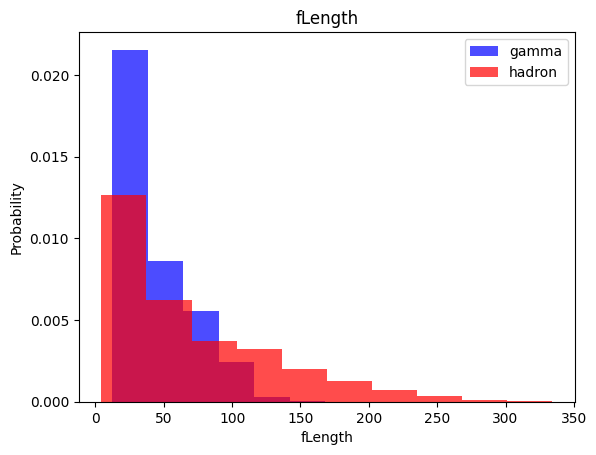

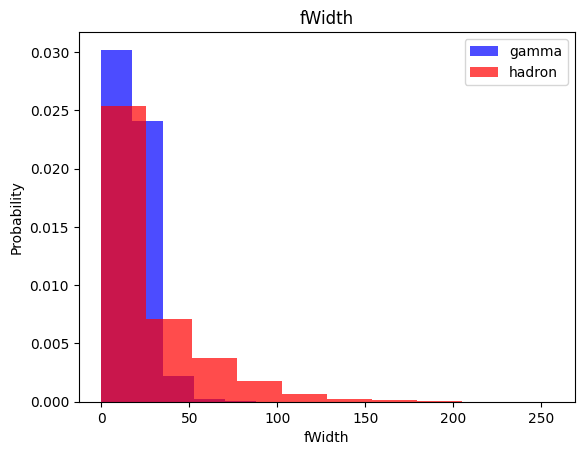

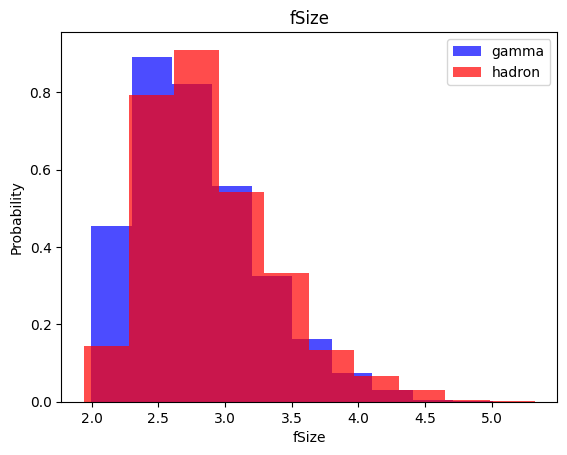

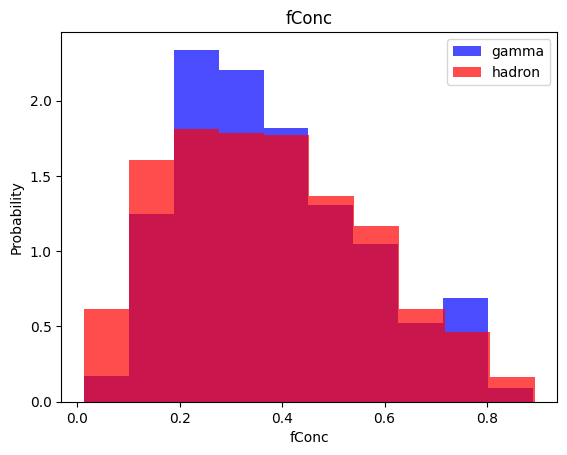

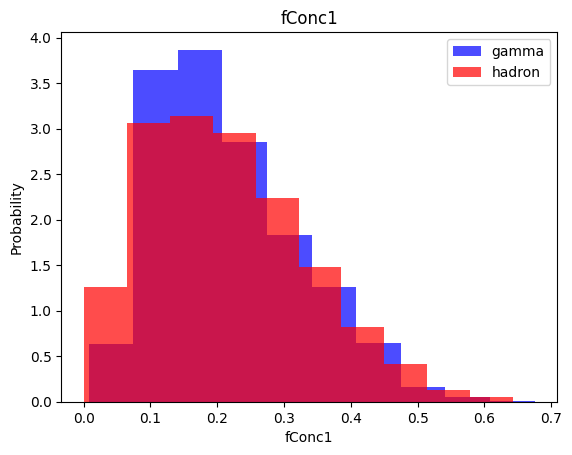

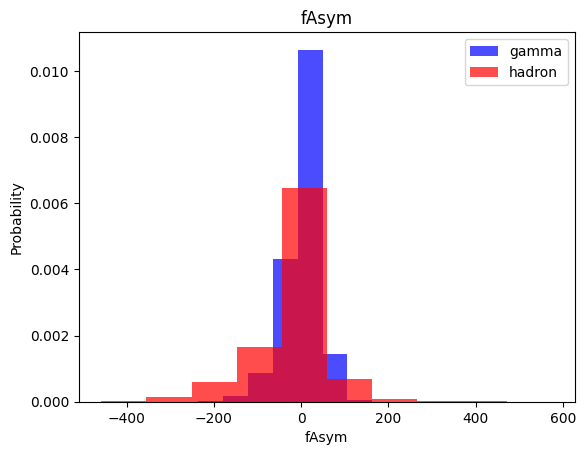

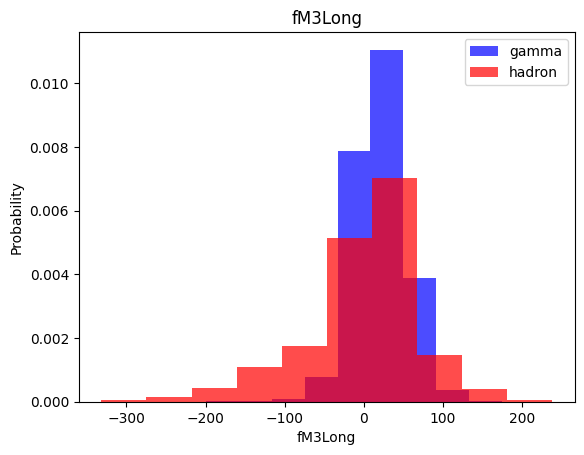

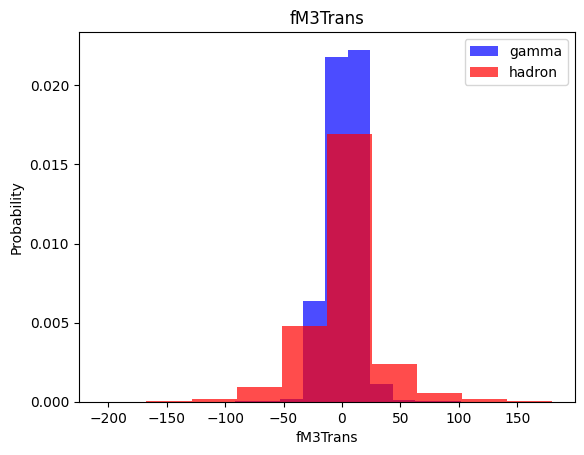

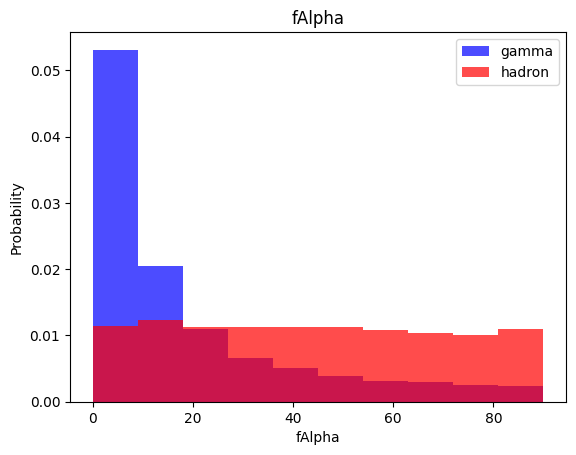

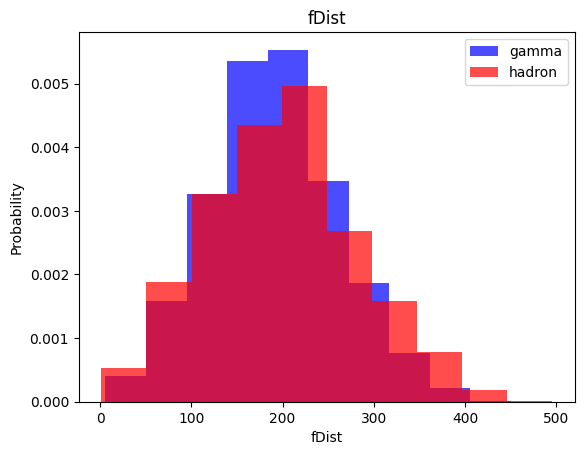

In [ ]:
for label in cols[:-1]:     # class label laai exclude garna laai cols[:-1] greko
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# to understarnd the above code

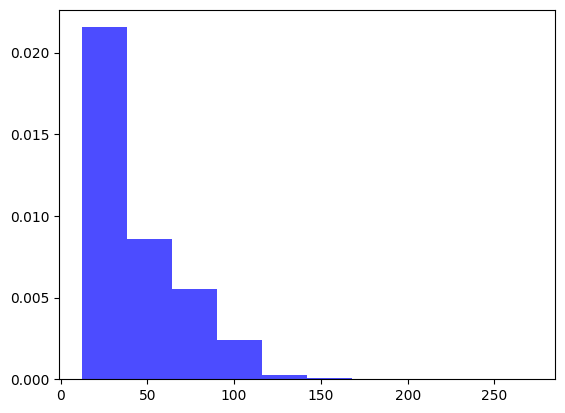

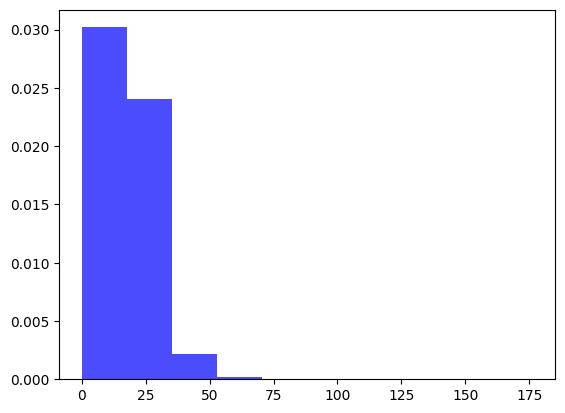

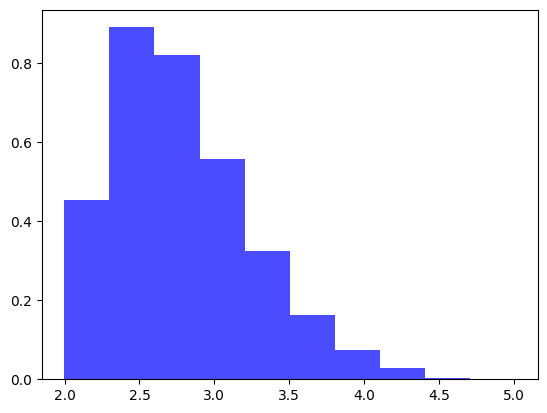

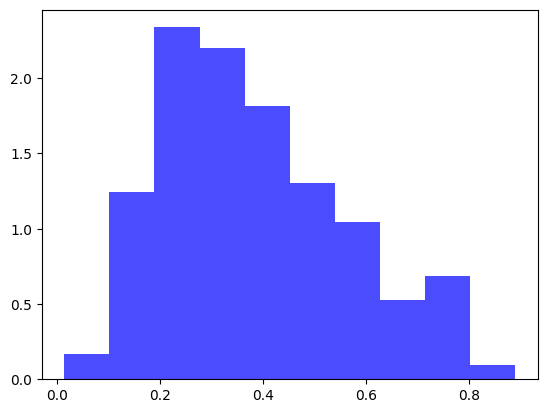

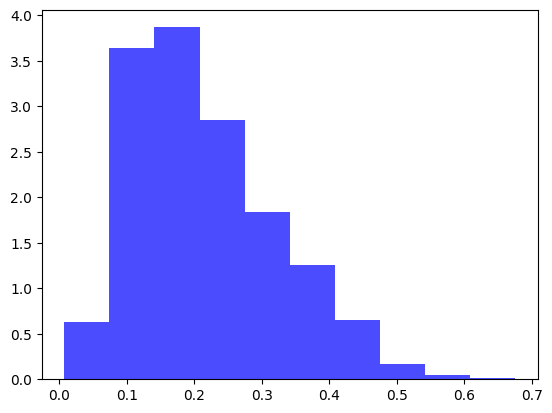

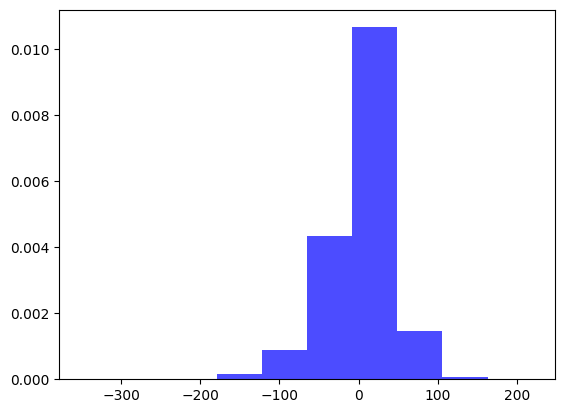

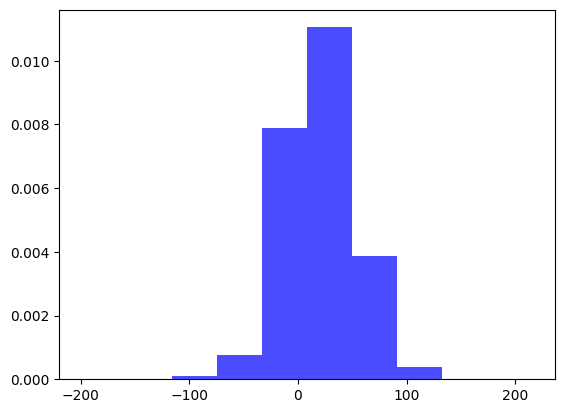

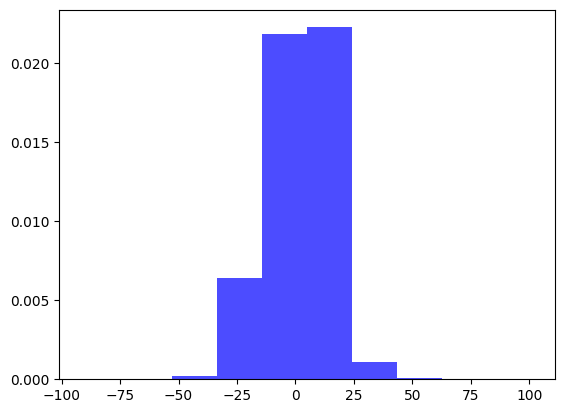

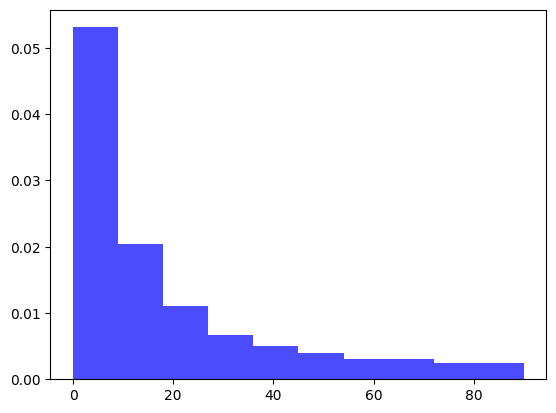

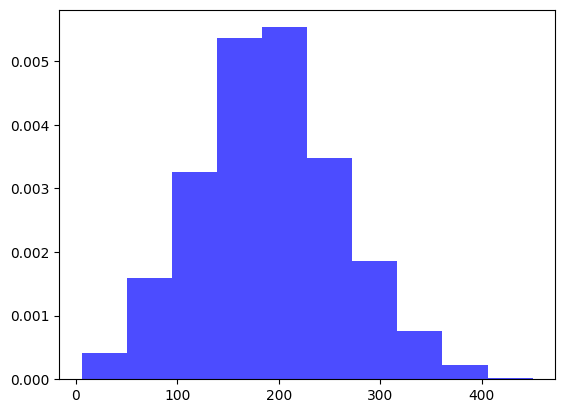

In [ ]:
for label in cols[:-1]:
  plt.hist(
    df[df["class"]==1][label],   # Subset of data with class equal to 1   (This selects a subset of the DataFrame df where the values in the "class" column are equal to 1. The specific column being selected is label.)
    color='blue',                 # Color of the histogram bars
    label='gamma',                # Label for the histogram bars    (Assigns the label "gamma" to the histogram bars, which can be used to create a legend for the plot.)
    alpha=0.7,                    # Transparency of the histogram bars. A value of 1.0 means fully opaque, while 0.0 means fully transparent. Here, the bars will be semi-transparent.
    density=True                  # Normalize the histogram to represent a probability density. This means that the area under the histogram will sum up to 1, allowing for comparison between different histograms with different bin sizes or sample sizes.
  )
  plt.show()

# Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])    # The first int(0.6*len(df)) rows will be assigned to the train subset, the subsequent rows until int(0.8*len(df)) will be assigned to the valid subset, and the remaining rows will be assigned to the test subset.

# in summery, The train subset contains 60% of the shuffled data, the valid subset contains 20%, and the test subset contains the remaining 20%.


# np.split(): This is a function from the NumPy library that splits an array or DataFrame into multiple sub-arrays based on the provided indices. In this case, it will split the shuffled DataFrame into three parts: train, valid, and test.
# df.sample(frac=1): This code randomly shuffles the rows of the DataFrame (df) by using the sample method with frac=1. The frac=1 parameter means that all rows of the DataFrame will be included in the shuffled sample.

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values        # X represents the input features, and y represents the corresponding target labels.
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()     # It provides a way to standardize features by subtracting the mean and scaling to unit variance. ie, x_new = (x - mean) / standard deviation
  X = scaler.fit_transform(X)   # "fit" method computes the mean and standard deviation of the input data and "transform" method applies the standardization to the data. The transformed data "X" will have zero mean and unit variance. To achieve zero mean and unit variance, the data is typically transformed using the following formula: x_new = (x - mean) / standard deviation

  if oversample:
    ros = RandomOverSampler()       # for handling imbalanced datasets. Random over-sampling aims to address the class imbalance by randomly duplicating examples from the minority class until both classes have an equal number of samples.
    X, y = ros.fit_resample(X, y)   # "fit_resample" learns the distribution of the minority class and randomly duplicates examples until the classes are balanced.

  data = np.hstack((X, np.reshape(y, (-1, 1))))   # Concatenate the scaled features X with the reshaped target variable y using np.hstack, resulting in a new NumPy array data. "X" is 2D object but y is 1D. So, y laai 2D maa reshape gareko. passing (-1,1) means make this 2d array. where -1 means infer what this dimension value would be, which end up being the length of y (len(y))

  return data, X, y



# "np.hstack" concatenates the arrays horizontally, resulting in a new array where the columns of X are followed by the reshaped y column vector.
#  (-1, 1) means that the resulting array should have one column (1), and the number of rows (-1) should be inferred automatically based on the length of the array.

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)  # "X_train" represents the feature data and "y_train" represents the corresponding target labels
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
len(y_train)

14664

In [ ]:
sum(y_train == 1)

7332

In [ ]:
sum(y_train == 0)

7332

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)   # trains the knn model using the fit method,

# where:
# X_train represents the feature data used for training the model.
# y_train represents the corresponding target labels for the training data.

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)    # predicts the labels for the test data (X_test) using the trained model (kNN_model). The predict method takes the test data as input and returns the predicted labels (y_pred).

In [ ]:
print(classification_report(y_test, y_pred))   #  generates a classification report based on the true labels (y_test) and the predicted labels (y_pred). The classification_report function compares the true labels with the predicted labels and calculates various classification metrics such as precision, recall, F1-score, and support for each class.

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1253
           1       0.88      0.85      0.87      2551

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.80      3804
weighted avg       0.83      0.82      0.83      3804



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)   # trains the nb model using the fit method,

# where:
# X_train represents the feature data used for training the model.
# y_train represents the corresponding target labels for the training data.

In [ ]:
y_pred = nb_model.predict(X_test)   # predicts the labels for the test data (X_test) using the trained model (nb_model). The predict method takes the test data as input and returns the predicted labels (y_pred).
print(classification_report(y_test, y_pred))    #  generates a classification report based on the true labels (y_test) and the predicted labels (y_pred). The classification_report function compares the true labels with the predicted labels and calculates various classification metrics such as precision, recall, F1-score, and support for each class.

              precision    recall  f1-score   support

           0       0.66      0.42      0.52      1253
           1       0.76      0.89      0.82      2551

    accuracy                           0.74      3804
   macro avg       0.71      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



# Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1253
           1       0.86      0.82      0.84      2551

    accuracy                           0.79      3804
   macro avg       0.76      0.78      0.77      3804
weighted avg       0.80      0.79      0.79      3804



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1253
           1       0.91      0.89      0.90      2551

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  # Create a figure with two subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))     # creates a figure with two subplots arranged side by side (One row and two columns). The figure size is set to 10 inches wide and 4 inches high.


  # Plot training and validation loss over different epochs. Epochs means like training cycles.
  ax1.plot(history.history['loss'], label='loss')     # plots the training loss values over epochs using the 'loss' key from the history object.
  ax1.plot(history.history['val_loss'], label='val_loss')   # plots the validation loss values. These lines represent how the loss values change during training and validation.
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')     # y-axis represents the binary crossentropy loss.
  ax1.grid(True)    #  enables gridlines in the first subplot, making it easier to interpret the plotted values.


   # Plot training and validation accuracy over all the epochs.
  ax2.plot(history.history['accuracy'], label='accuracy')     # plots the training accuracy values over epochs using the 'accuracy' key from the history object.
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')   # plots the validation accuracy values. These lines represent how the accuracy values change during training and validation.
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')    # y-axis represents the accuracy values
  ax2.grid(True)    # enables gridlines in the second subplot.


  plt.show()    # displays the figure with the two subplots. The training and validation loss are visualized in the left subplot, while the training and validation accuracy are visualized in the right subplot.



  # By using this function, you can visualize how the loss and accuracy metrics change during training and validation epochs.
  # It provides insights into the model's performance and can help identify patterns such as overfitting, underfitting, convergence, or instability.

In [ ]:
# The code provided defines a function "train_model" that creates and trains a neural network model using TensorFlow.
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):     # X_train represents the features and y_train represents the target labels. num_nodes: The number of nodes in each hidden layer of the neural network. dropout_prob: The probability of dropout regularization applied to the hidden layers. lr: The learning rate used by the Adam optimizer during training. batch_size: The number of samples in each mini-batch during training. epochs: The number of training epochs.

  # Create a sequential model
  nn_model = tf.keras.Sequential([          # Inside the function, a sequential model is created using tf.keras.Sequential. The model consists of several dense (fully connected) layers with specified numbers of nodes and activation functions. Dropout layers are inserted between the dense layers to apply dropout regularization.
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  # Compile the model
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])      # The model is compiled using nn_model.compile. The Adam optimizer is used with the specified learning rate (lr). The loss function is set to 'binary_crossentropy' since it is a binary classification problem. The metric for evaluation is set to 'accuracy'.



  # Train the model
  history = nn_model.fit( X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0 )      # The model is trained using nn_model.fit. The training data (X_train and y_train) is used for training. The number of epochs and batch size are specified, along with a validation split of 0.2 (20% of the training data is used for validation). verbose=0 suppresses the output during training, so no progress updates are printed.



  return nn_model, history      # The trained model (nn_model) and the training history (history) are returned from the function.



  # This function allows you to create and train a neural network model with flexible architecture and training parameters using TensorFlow. It's important to pass appropriate input data (X_train and y_train) and adjust hyperparameters like the number of nodes, dropout probability, learning rate, batch size, and number of epochs based on your specific problem and dataset.

16 nodes, dropout 0, lr 0.01, batch size 32


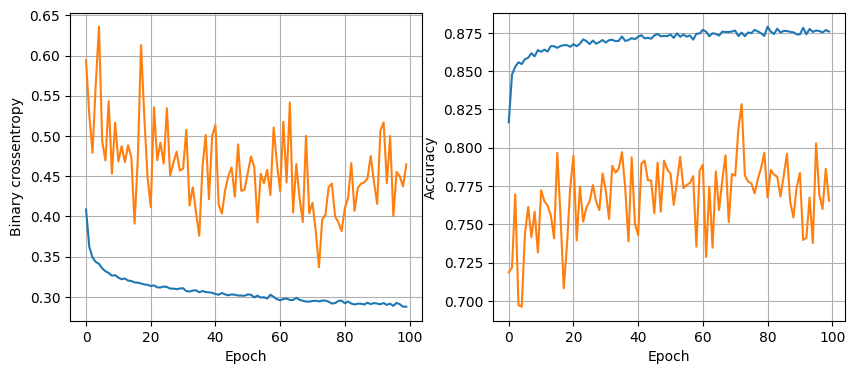

119/119 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8638
16 nodes, dropout 0, lr 0.01, batch size 64


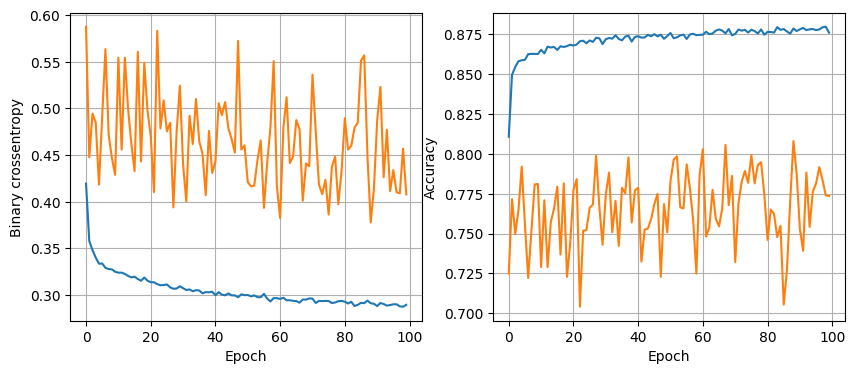

119/119 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8617
16 nodes, dropout 0, lr 0.01, batch size 128


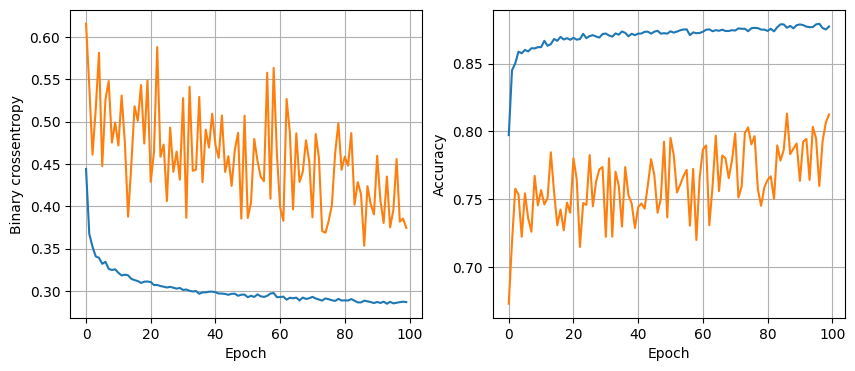

119/119 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8583
16 nodes, dropout 0, lr 0.005, batch size 32


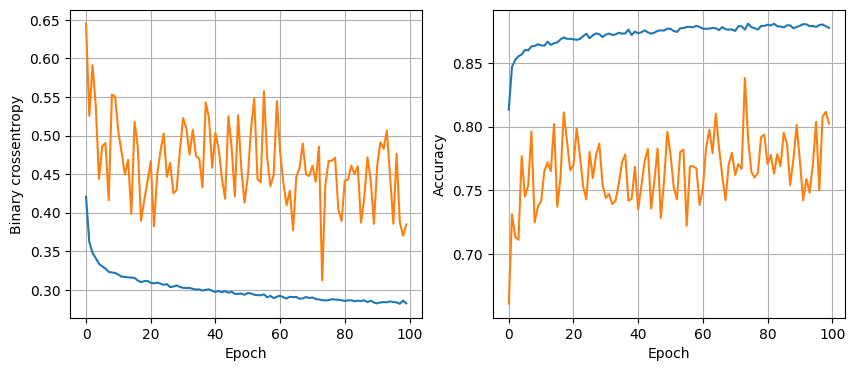

119/119 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8633
16 nodes, dropout 0, lr 0.005, batch size 64


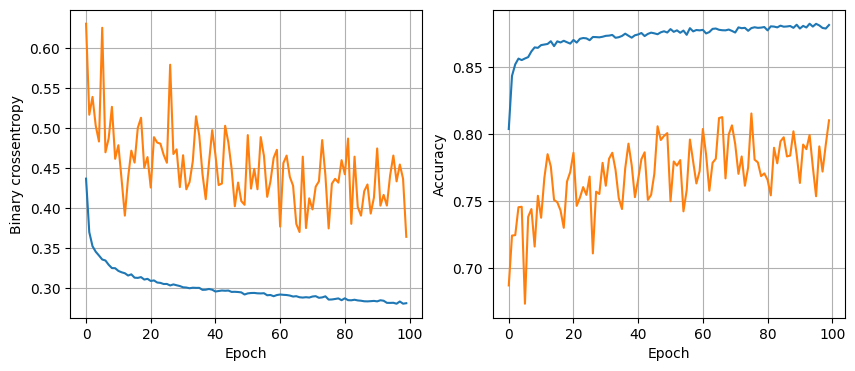

119/119 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8644
16 nodes, dropout 0, lr 0.005, batch size 128


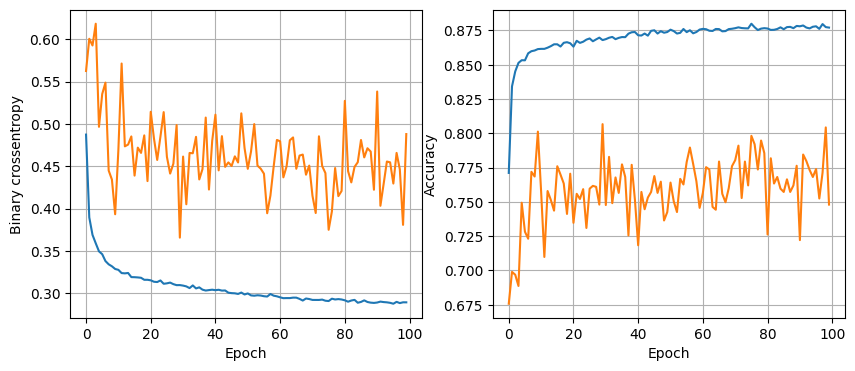

119/119 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.001, batch size 32


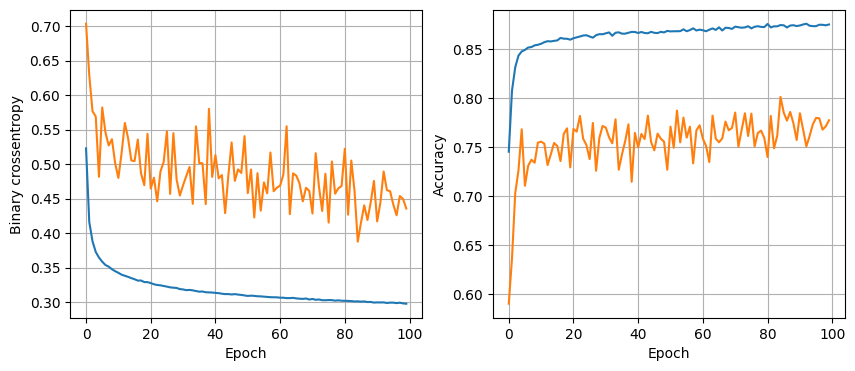

119/119 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8654
16 nodes, dropout 0, lr 0.001, batch size 64


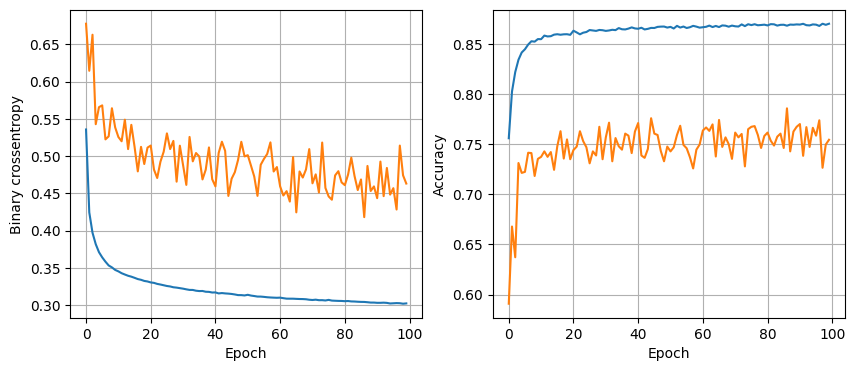

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.001, batch size 128


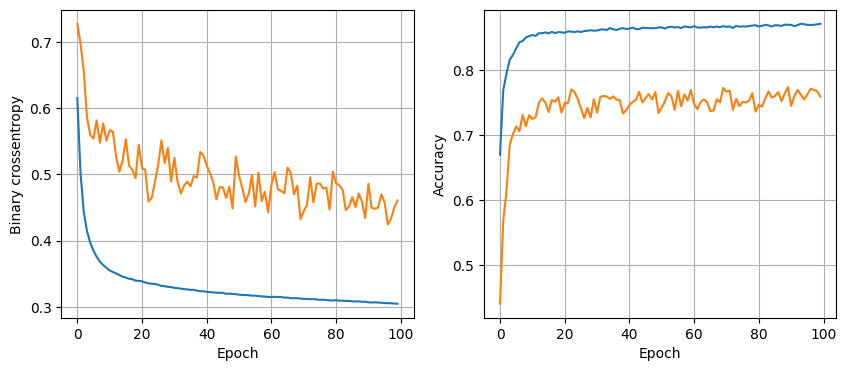

119/119 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.01, batch size 32


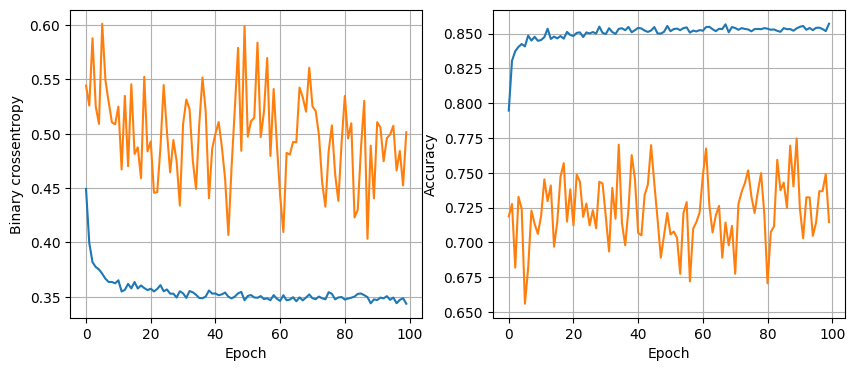

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.01, batch size 64


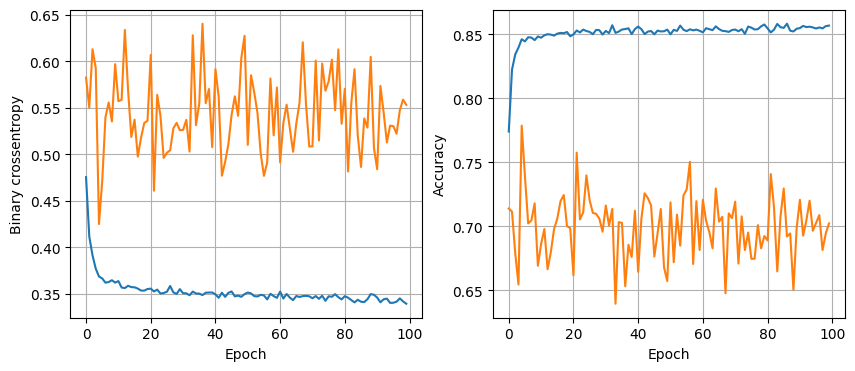

119/119 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.01, batch size 128


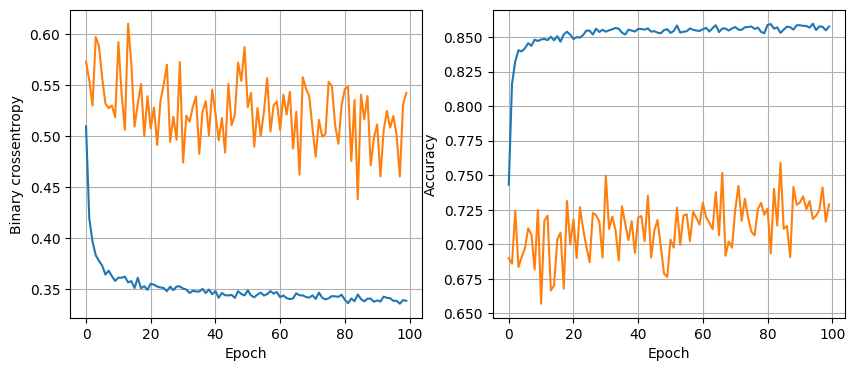

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.005, batch size 32


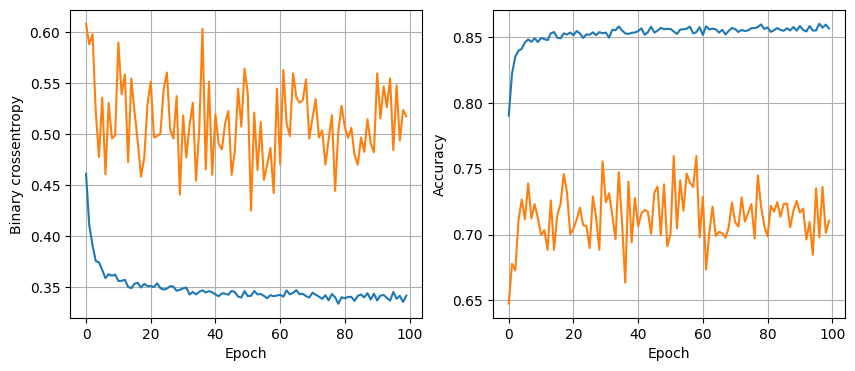

119/119 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.005, batch size 64


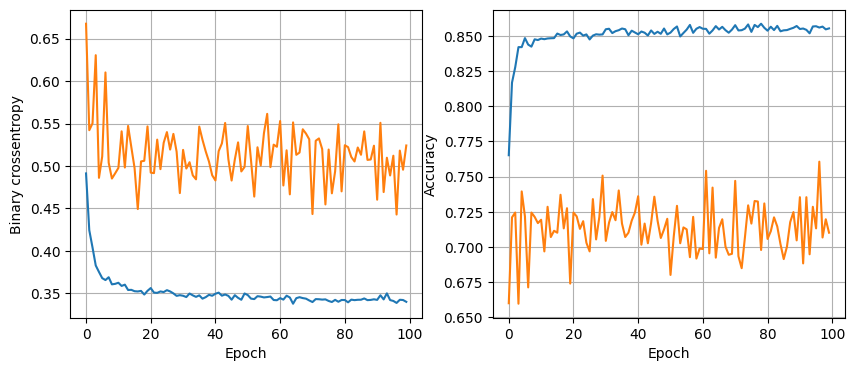

119/119 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.005, batch size 128


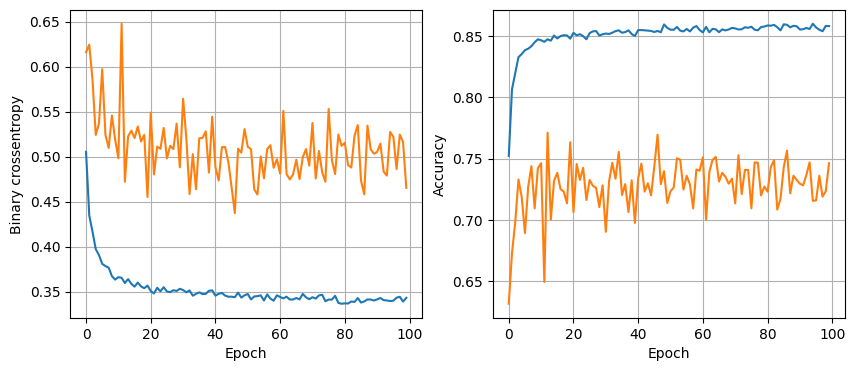

119/119 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.001, batch size 32


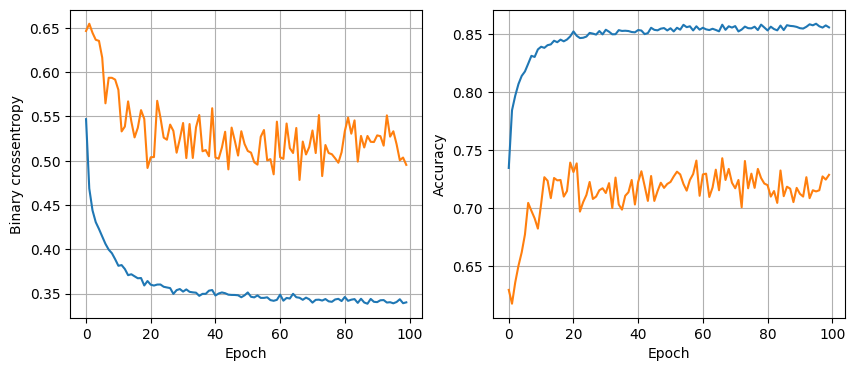

119/119 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.001, batch size 64


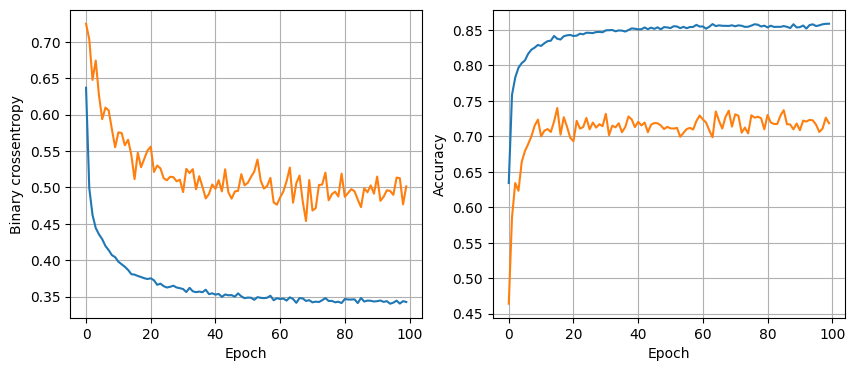

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.001, batch size 128


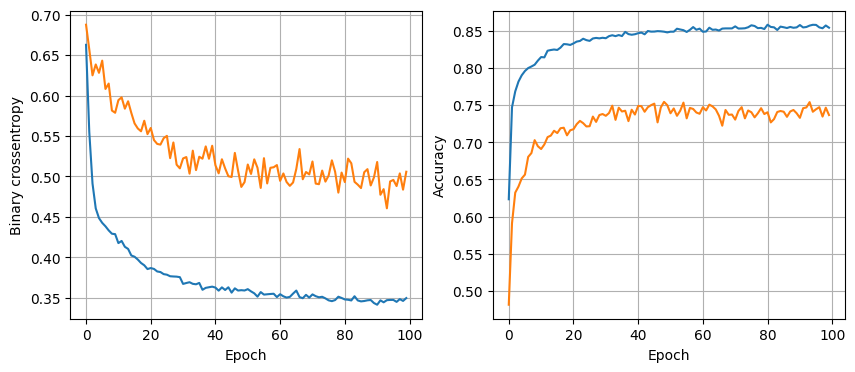

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.01, batch size 32


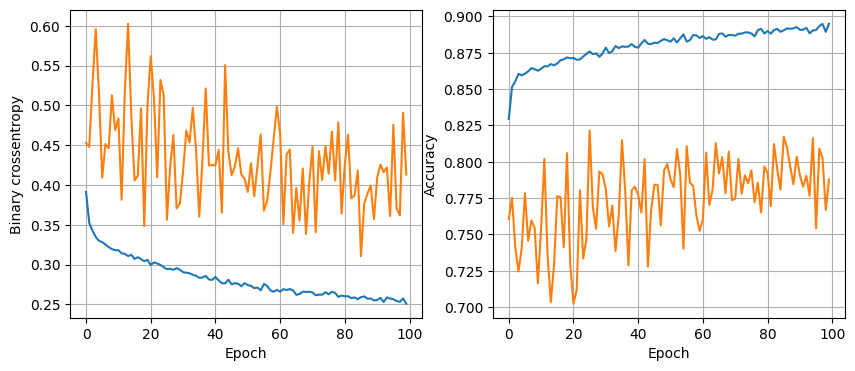

119/119 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.01, batch size 64


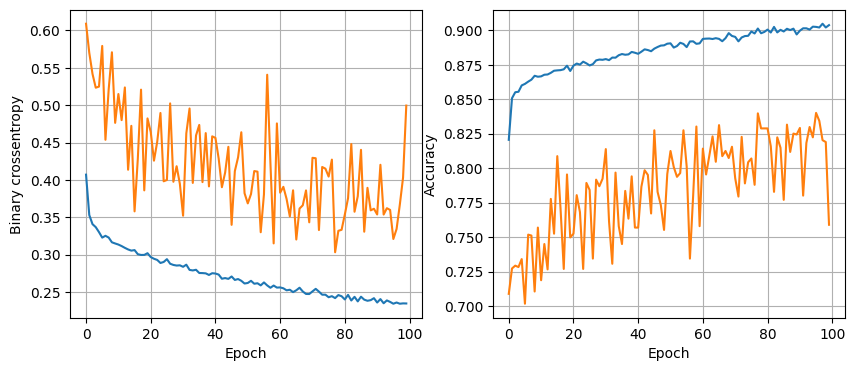

119/119 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8580
32 nodes, dropout 0, lr 0.01, batch size 128


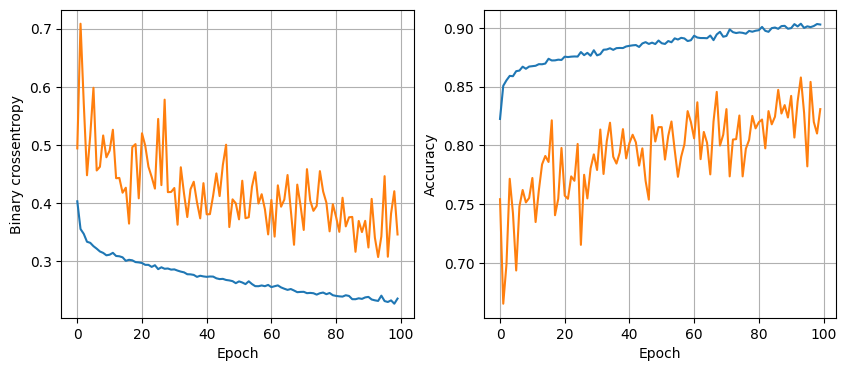

119/119 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8604
32 nodes, dropout 0, lr 0.005, batch size 32


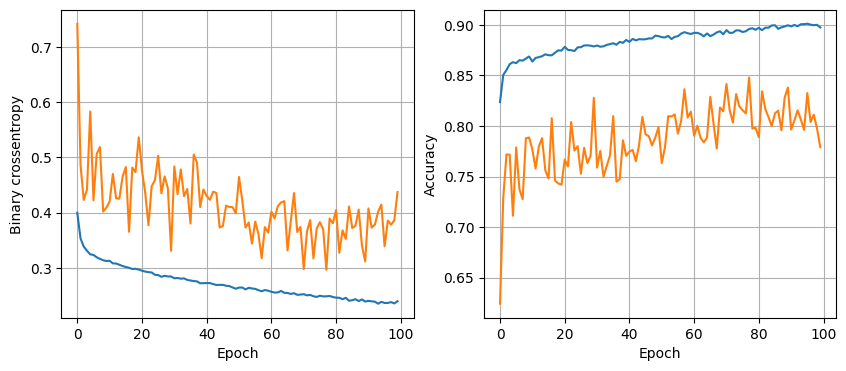

119/119 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8599
32 nodes, dropout 0, lr 0.005, batch size 64


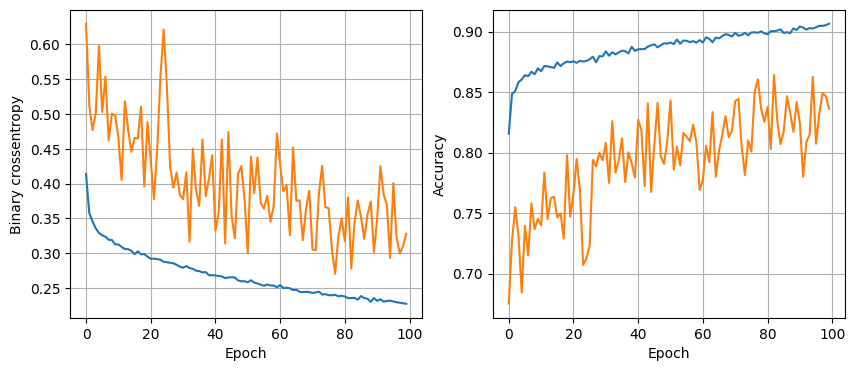

119/119 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8575
32 nodes, dropout 0, lr 0.005, batch size 128


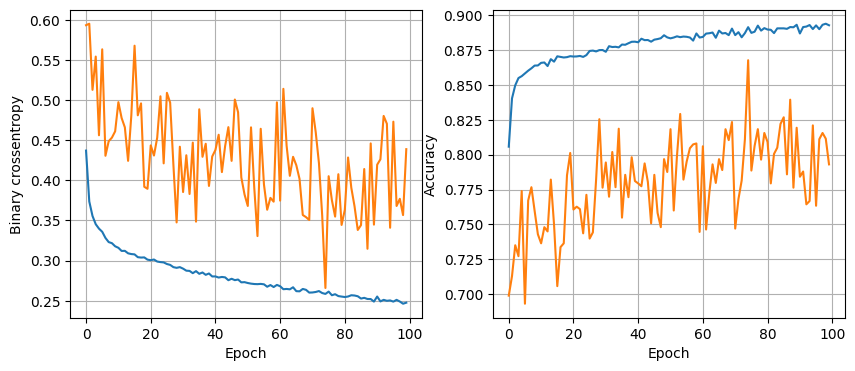

119/119 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.001, batch size 32


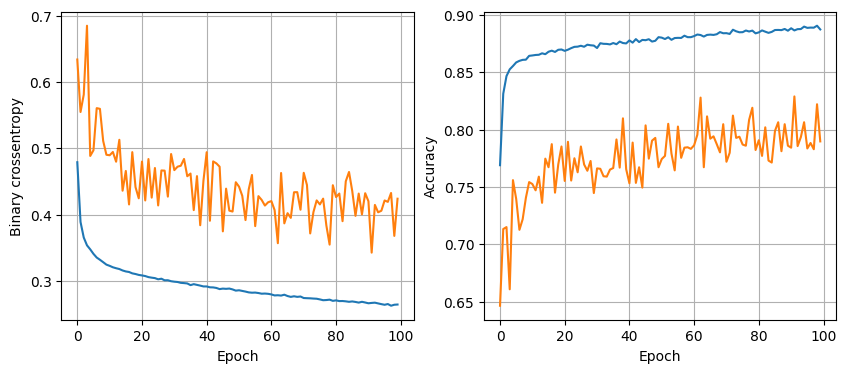

119/119 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8670
32 nodes, dropout 0, lr 0.001, batch size 64


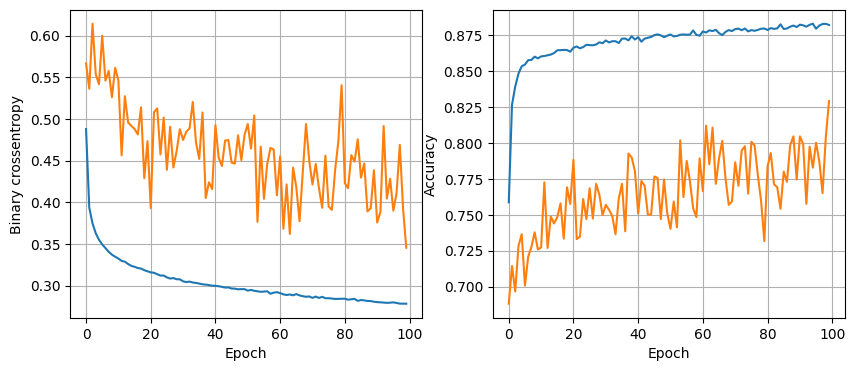

119/119 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.001, batch size 128


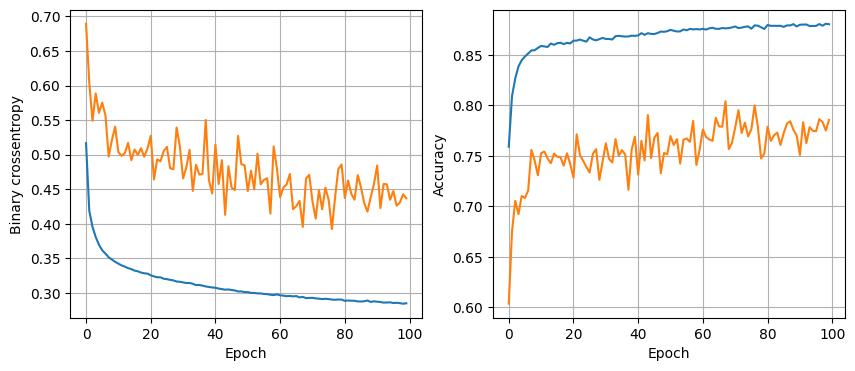

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8654
32 nodes, dropout 0.2, lr 0.01, batch size 32


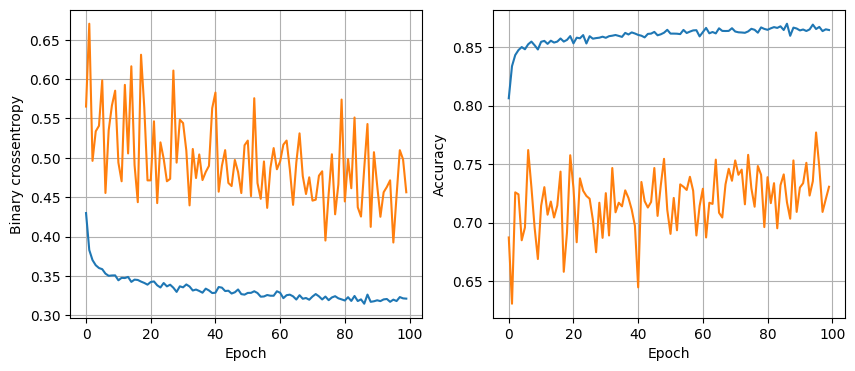

119/119 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.01, batch size 64


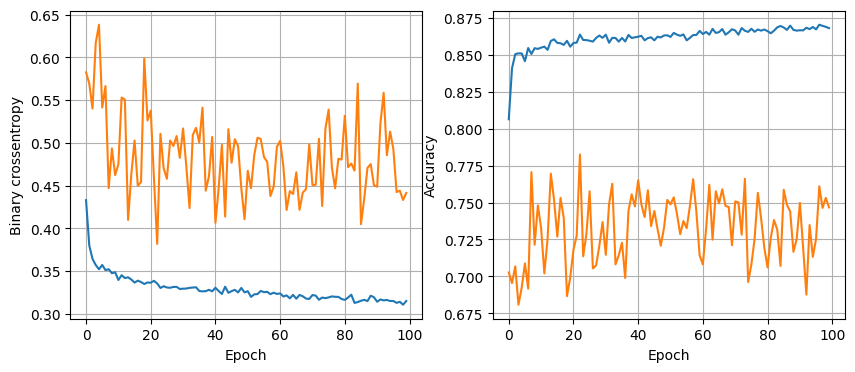

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8704
32 nodes, dropout 0.2, lr 0.01, batch size 128


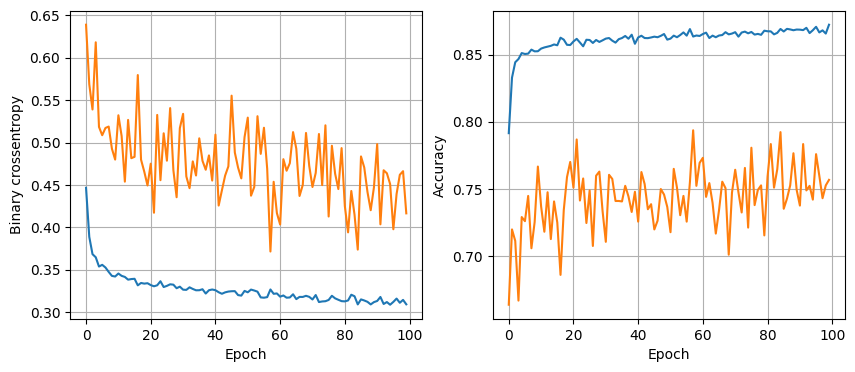

119/119 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8646
32 nodes, dropout 0.2, lr 0.005, batch size 32


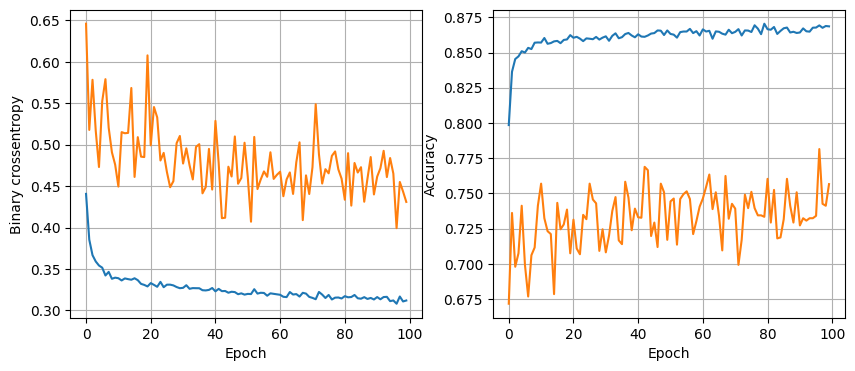

119/119 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8683
32 nodes, dropout 0.2, lr 0.005, batch size 64


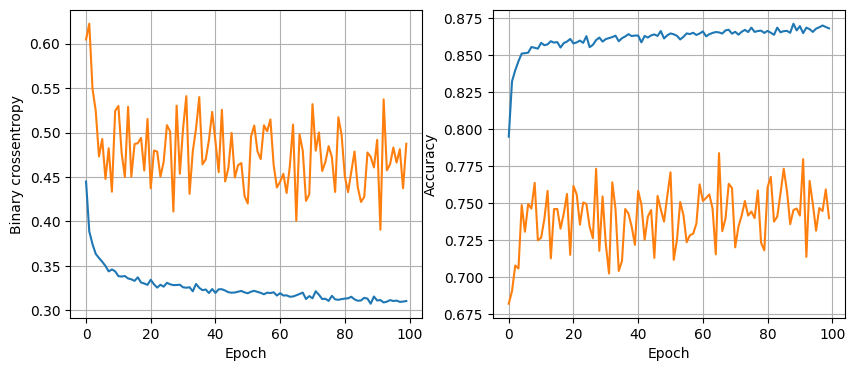

119/119 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.005, batch size 128


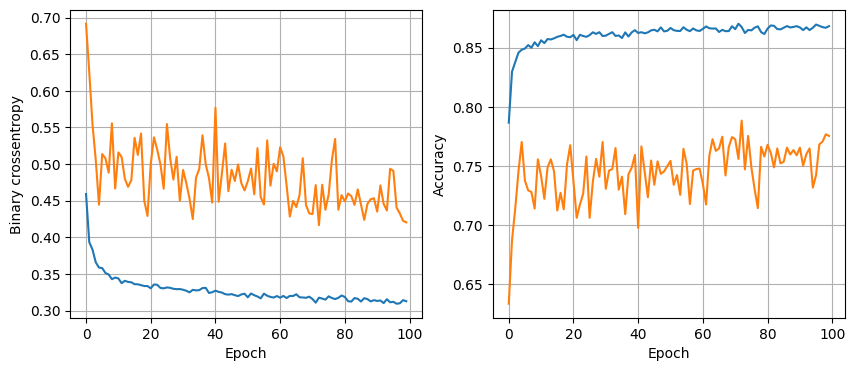

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8672
32 nodes, dropout 0.2, lr 0.001, batch size 32


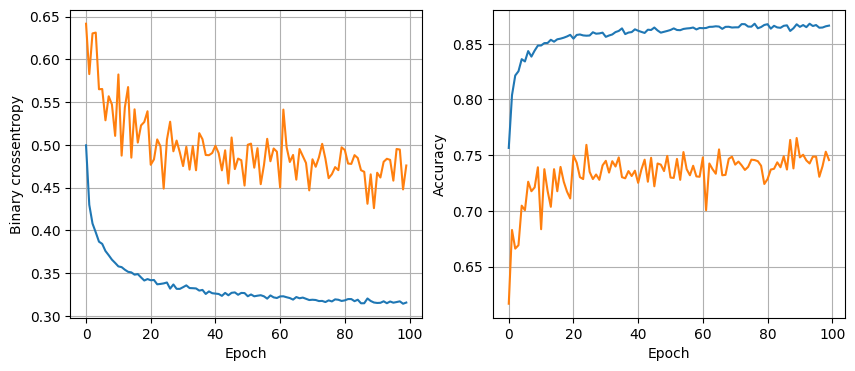

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.001, batch size 64


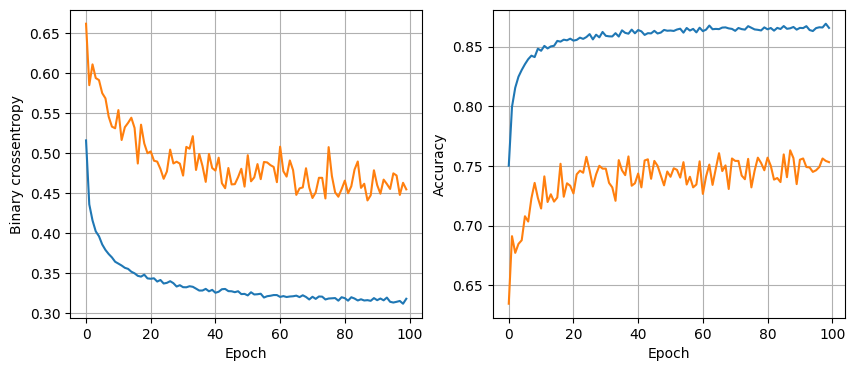

119/119 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.001, batch size 128


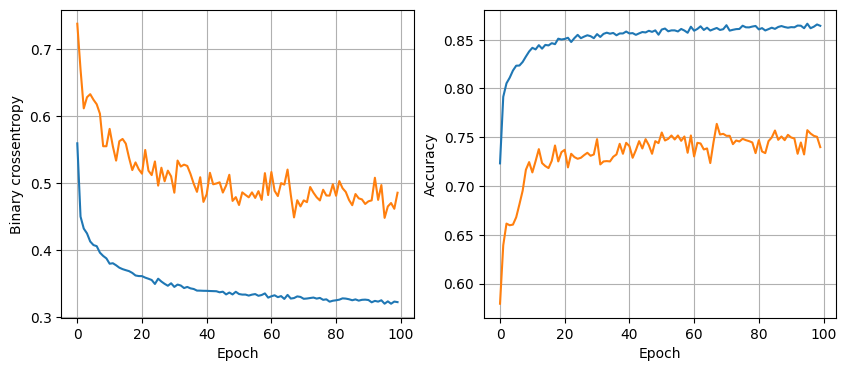

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8738
64 nodes, dropout 0, lr 0.01, batch size 32


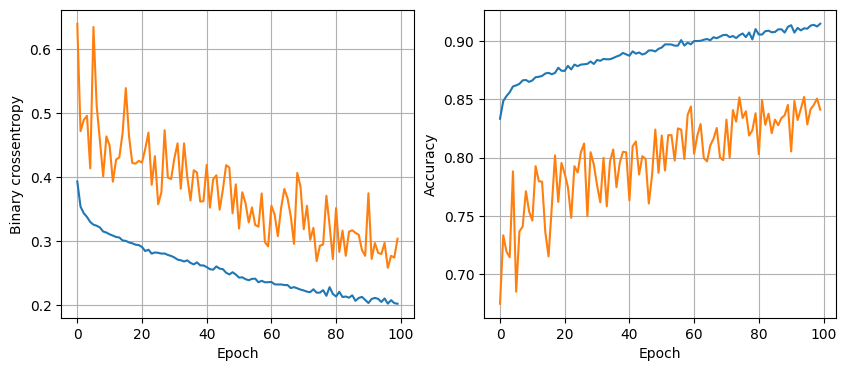

119/119 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.8554
64 nodes, dropout 0, lr 0.01, batch size 64


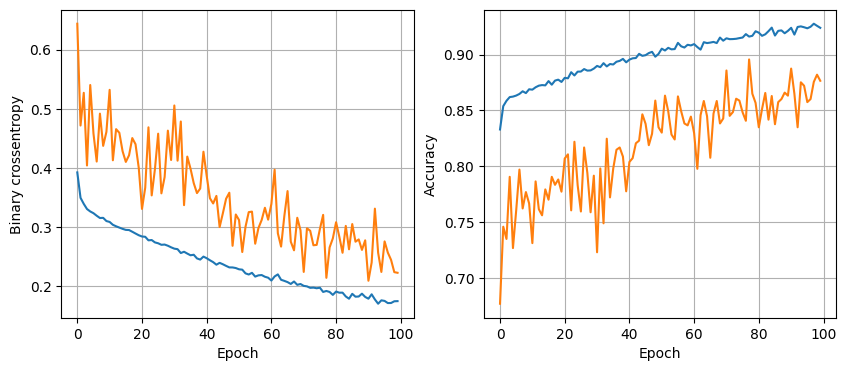

119/119 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.8425
64 nodes, dropout 0, lr 0.01, batch size 128


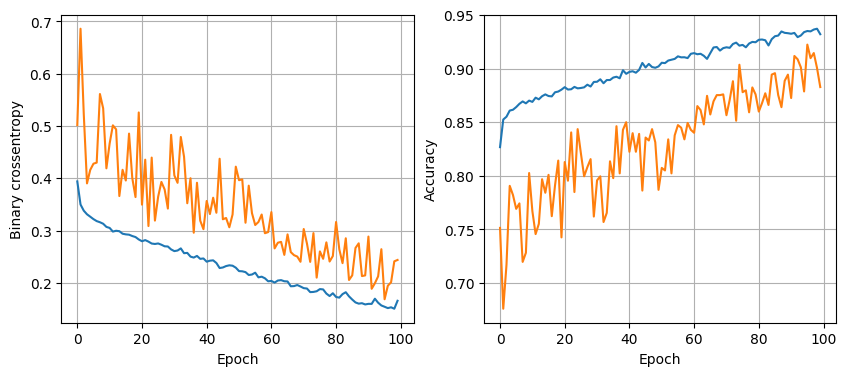

119/119 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.8389
64 nodes, dropout 0, lr 0.005, batch size 32


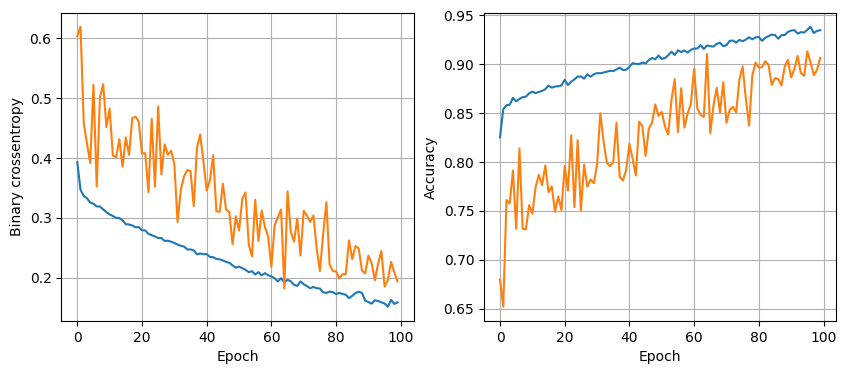

119/119 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.8438
64 nodes, dropout 0, lr 0.005, batch size 64


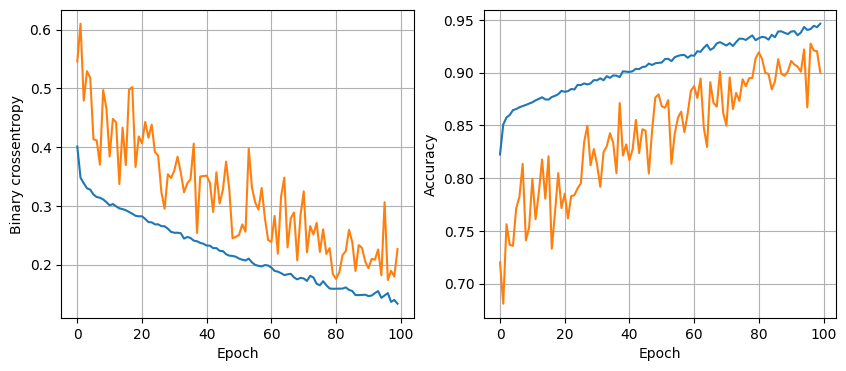

119/119 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.8541
64 nodes, dropout 0, lr 0.005, batch size 128


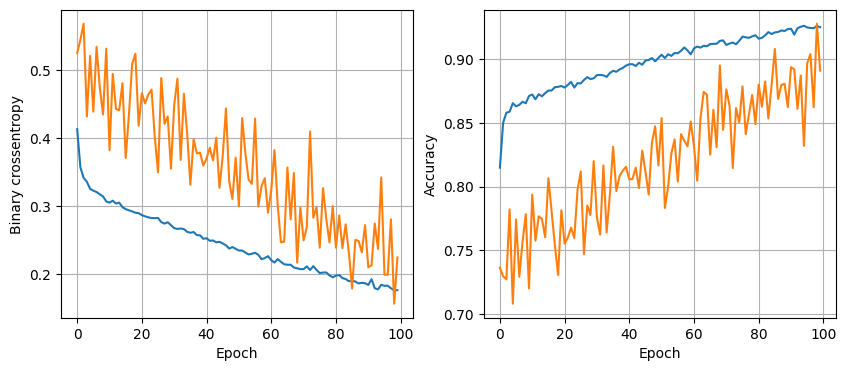

119/119 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.8433
64 nodes, dropout 0, lr 0.001, batch size 32


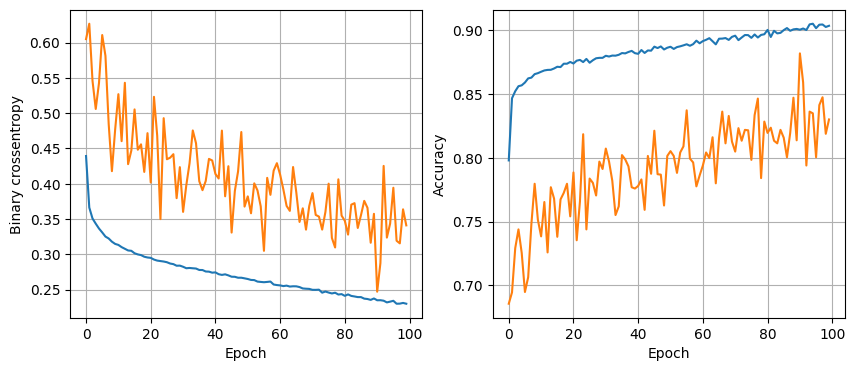

119/119 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8633
64 nodes, dropout 0, lr 0.001, batch size 64


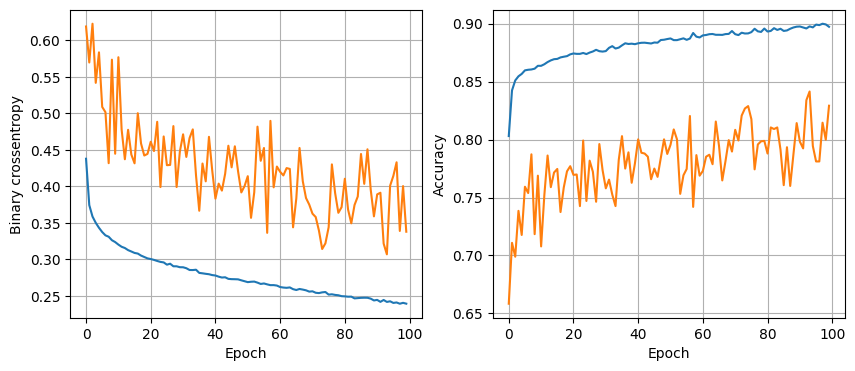

119/119 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8620
64 nodes, dropout 0, lr 0.001, batch size 128


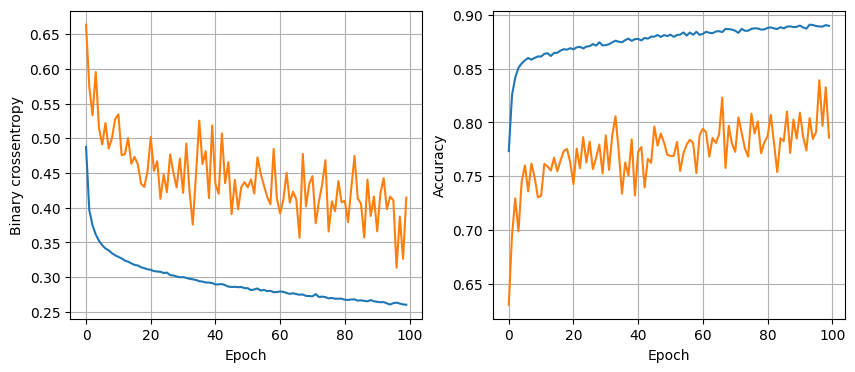

119/119 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.8665
64 nodes, dropout 0.2, lr 0.01, batch size 32


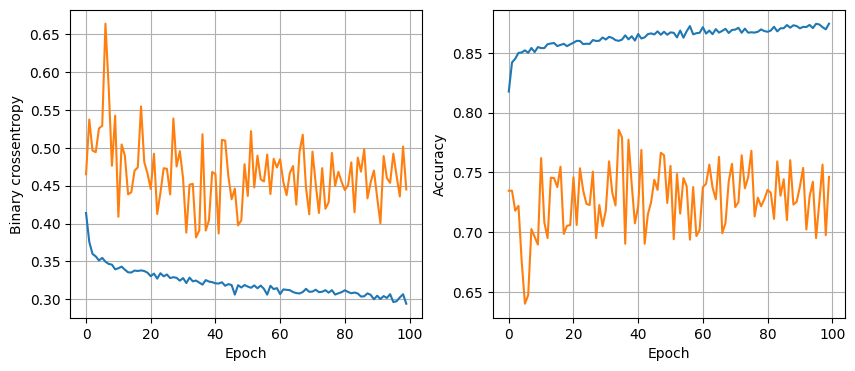

119/119 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.01, batch size 64


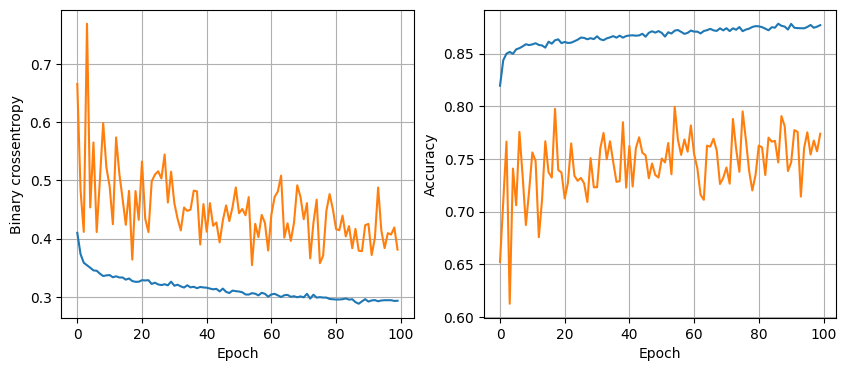

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8657
64 nodes, dropout 0.2, lr 0.01, batch size 128


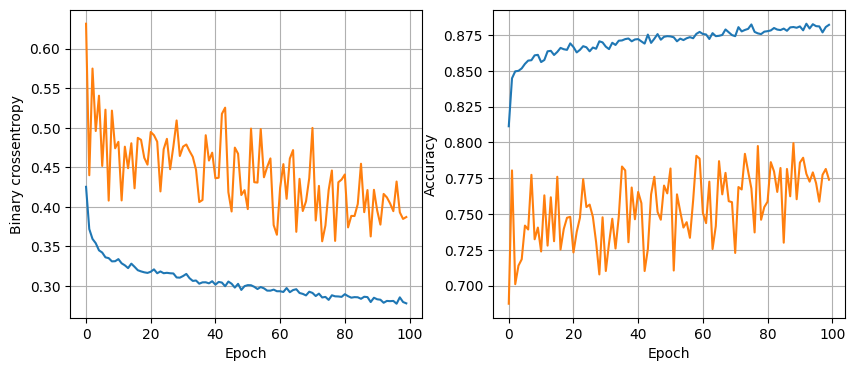

119/119 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.005, batch size 32


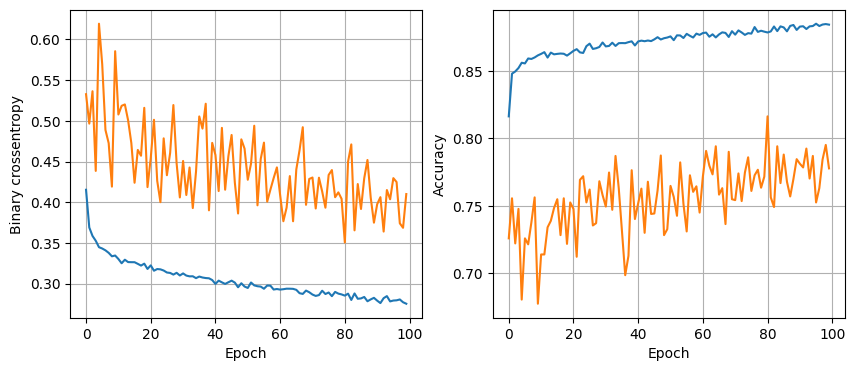

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8764
64 nodes, dropout 0.2, lr 0.005, batch size 64


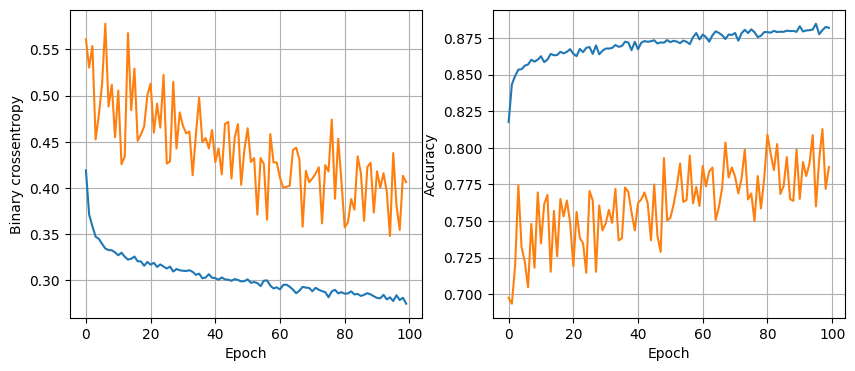

119/119 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.005, batch size 128


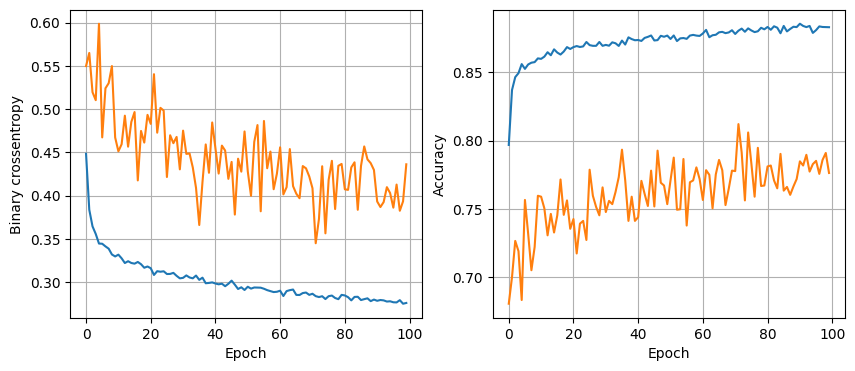

119/119 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.001, batch size 32


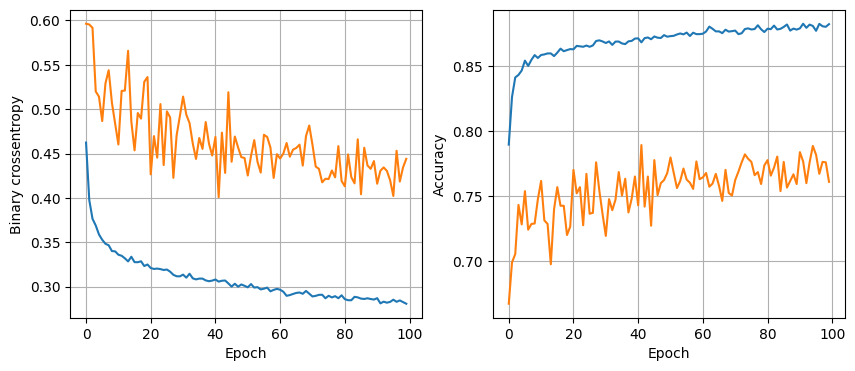

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.001, batch size 64


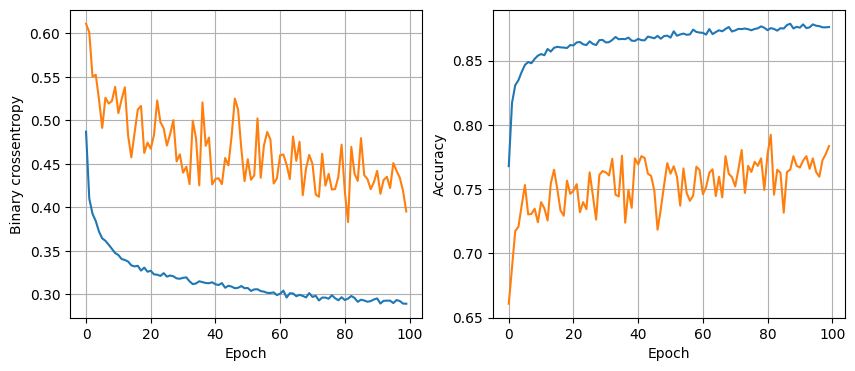

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.001, batch size 128


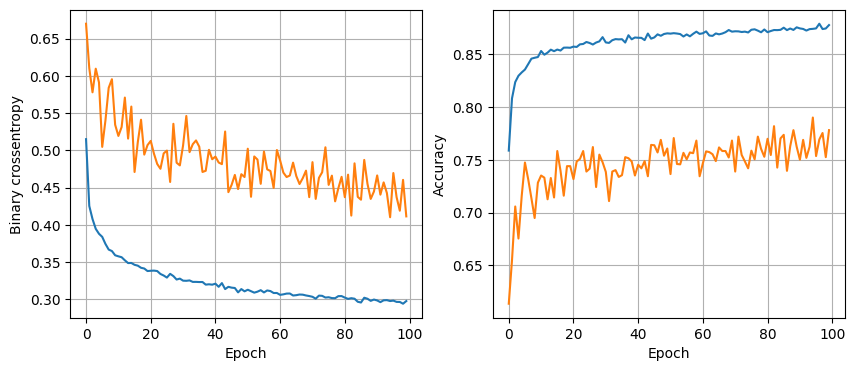

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8754


In [ ]:
# The code provided performs a hyperparameter search using nested loops to iterate over different combinations of hyperparameters.
# It trains multiple models with different hyperparameter settings, evaluates their performance, and keeps track of the model with the least validation loss.

least_val_loss = float('inf')       # least_val_loss is initialized with a very large value (float('inf')) to ensure that any validation loss encountered during the search will be smaller.
least_loss_model = None           # least_loss_model is initialized as None, indicating that no model has been found yet with the least validation loss.
epochs=100

# Nested loops to iterate over different hyperparameters
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")  # Inside the loop, the current hyperparameters are printed.

        # Train a model with the current hyperparameters
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)     # The "train_model" function is called to train a model with the current hyperparameters

        # Plot the training history
        plot_history(history)         # The plot_history function is called to visualize the training history of the model.

        # Evaluate the model on the validation data
        val_loss = model.evaluate(X_valid, y_valid)[0]      # The trained model is evaluated on the validation data (X_valid and y_valid) using model.evaluate. The validation loss (val_loss) is extracted from the evaluation results.

        # Update the model with the least validation loss
        if val_loss < least_val_loss:         # If the current model has a lower validation loss than the previously found minimum (least_val_loss), the least_val_loss is updated with the new value, and the least_loss_model is set to the current model.
          least_val_loss = val_loss
          least_loss_model = model




# By the end of the nested loops, the code identifies the model with the least validation loss among all the tested hyperparameter combinations. This model is stored in the least_loss_model variable.
# The code prints the hyperparameter combinations and plots the training history for each combination, allowing you to analyze the performance of different models and choose the one with the best validation loss for further evaluation or testing.


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 4ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1253
           1       0.90      0.93      0.91      2551

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804



In [ ]:
# Tensorflow keep track of the history of the training which is whay we can go and plot it later on.